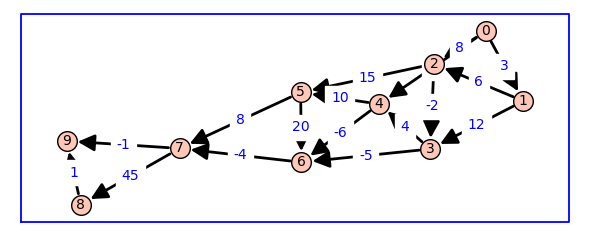

In [1]:
D = DiGraph([(0,1,3),(0,2,8),(0,4,7),(1,2,6),(1,3,12),(2,3,-2),(2,5,15),(3,4,4),(3,6,-5),(4,5,10),(4,6,-6),(5,6,20),(5,7,8),(6,7,-4),(7,8,45),(7,9,-1),(8,9,1)], weighted=True)
H = D.plot(edge_labels=True, graph_border=True)
H.show()

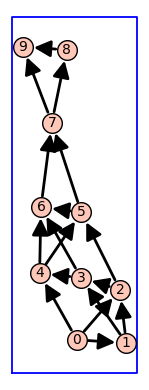

In [3]:
H = D.plot(edge_labels=False, graph_border=True)
H.show()

In [2]:
print(D.edges(0))

[(0, 1, 3), (0, 2, 8), (0, 4, 7)]


In [4]:
D.shortest_paths(2, by_weight=True, algorithm="Bellman-Ford_Boost")

{2: [2],
 3: [2, 3],
 4: [2, 3, 4],
 5: [2, 3, 4, 5],
 6: [2, 3, 6],
 7: [2, 3, 6, 7],
 8: [2, 3, 6, 7, 8],
 9: [2, 3, 6, 7, 9]}

In [10]:
import numpy as np
visited = [False]*10
pred = [None]*10
dist = [np.inf]*10
print(visited, pred, dist)

[False, False, False, False, False, False, False, False, False, False] [None, None, None, None, None, None, None, None, None, None] [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


In [11]:
def PushPostDFS(v,S,D):
    visited[v] = True
    for i in D[v]:
        if not visited[i]:
            PushPostDFS(i,S,D)
    S.append(v)

In [12]:
from collections import deque

def SPFromOriginToEnd(D,s,t):
    Dreversed = D.reverse()
    S = deque()
    dist[s] = 0
    PushPostDFS(s,S,D)
#     print(S)
    if(t not in S):
        print("s don't have a path to t")
        return
    while True:
        u = S.pop()
#         print(u)
        for v in Dreversed.edges(u):
#             print(v)
            if(visited[v[1]] and dist[v[1]]+v[2]<dist[u]):
#                 print(f"{v[1]}->{u} is tense")
                pred[u] = v[1]
                dist[u] = dist[v[1]]+v[2]
        if(u==t):
            break
#         print(f"pred({u})={pred[u]}")
#         print(f"dist({u})={dist[u]}")
    path = dict()
    tmp = t
    while(tmp is not None):
        path[tmp] = pred[tmp]
        tmp = pred[tmp]
    return path

In [13]:
path = SPFromOriginToEnd(D,2,6)
print(path)

{6: 3, 3: 2, 2: None}
